Librerías y creación del DataFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df: pd.DataFrame = pd.read_csv("datos.csv")

Limpieza de datos

In [4]:
columnas_a_limpiar = ['Duration', 'Course Url','Course Title','Rating']
df_cleaned = df.dropna(subset=columnas_a_limpiar)

Se eliminan filas de las columnas definidas que tengan datos vacios, reduciendo la cantidad de datos

 cálculo del promedio de calificaciones para cada curso

In [6]:
promedio_calificaciones = df_cleaned.groupby('Course Title')['Rating'].mean().reset_index()
promedio_calificaciones.rename(columns={'Rating': 'promedio_calificacion'}, inplace=True)
print(promedio_calificaciones)

                                           Course Title  promedio_calificacion
0      Assisting Public Sector Decision Makers With ...               4.800000
1      Atención prehospitalaria del ictus agudo y se...               4.900000
2      Build a social media presence for your busine...               4.700000
3      Comercio, Inmigración y Tipos de Cambio en un...               4.900000
4      FPGA computing systems: Background knowledge ...               4.600000
5                      Future Healthcare Payment Models               4.500000
6         How to create Social Media graphics in Canva                4.200000
7      IBM and ISC2 Cybersecurity Specialist Profess...               4.800000
8      IT Security: Defense against the digital dark...               4.800000
9      Improving Immunity Based on Traditional Easte...               4.500000
10                    Incrementar - Parte 2 y Controlar               4.700000
11     Intel® Network Academy - Network Transformati

Se agrupan los cursos por su titulo obteniendo el promedio de calificaciones principalmente por encima de 4 indicando que la mayoria de cursos resiven calificaciones positivas

Calcular los cursos con mayor y menor rating

In [7]:
calificacion_maxima = df_cleaned['Rating'].max()
calificacion_minima = df_cleaned['Rating'].min()
cursos_mayor_calificacion = df_cleaned[df_cleaned['Rating'] == calificacion_maxima]
cursos_menor_calificacion = df_cleaned[df_cleaned['Rating'] == calificacion_minima]
print("Cursos con mayor calificación:")
print(cursos_mayor_calificacion)
print("\nCursos con menor calificación:")
print(cursos_menor_calificacion)

Cursos con mayor calificación:
                                           Course Title  Rating  \
166                      Songwriting: Writing the Music     5.0   
356                         Western Religions & Ecology     5.0   
362            El Holocausto: el abismo de la humanidad     5.0   
364                     莊子─人情 (Zhuangzi─Between People)     5.0   
376          Exploring Beethoven’s Piano Sonatas Part 2     5.0   
404                      Desenvolvendo sua musicalidade     5.0   
436          Exploring Beethoven's Piano Sonatas Part 5     5.0   
450               O Músico Contemporâneo Specialization     5.0   
451   Musician’s Professional Toolbox: Your Portfoli...     5.0   
576   Certified Business Analysis Professional™ (CBA...     5.0   
855       賽局與產業競爭策略 (Game Theory and Business Strategy)     5.0   
907             Business Problem Solving Specialization     5.0   
1007  Keller Williams Real Estate Agent Professional...     5.0   
1026                        Scr

Existen mas cursos con excelente calificacion de 5 que cursos con mala calificacion con puntuacion de 3 existiendo solo 3 cursos con la mas baja calificacion

Calculen el porcentaje de cursos con horario flexible en relación con el total
de cursos en el conjunto de datos

In [5]:
cursos_horario_flexible = df_cleaned[df_cleaned['Schedule'] == 'Flexible schedule']
total_cursos = len(df_cleaned)
total_horario_flexible = len(cursos_horario_flexible)
porcentaje_horario_flexible = (total_horario_flexible / total_cursos) * 100
print(porcentaje_horario_flexible)

96.81829480487198


Con el resultado del 96% tenemos que la mayoria de los cursos ofrecen un horario flexible, teniendo que la mayoria de los cursos se fijan en que los estudiantes tengan el tiempo para completarlos

gráfica de barras que muestre el número de cursos en cada nivel de dificultad

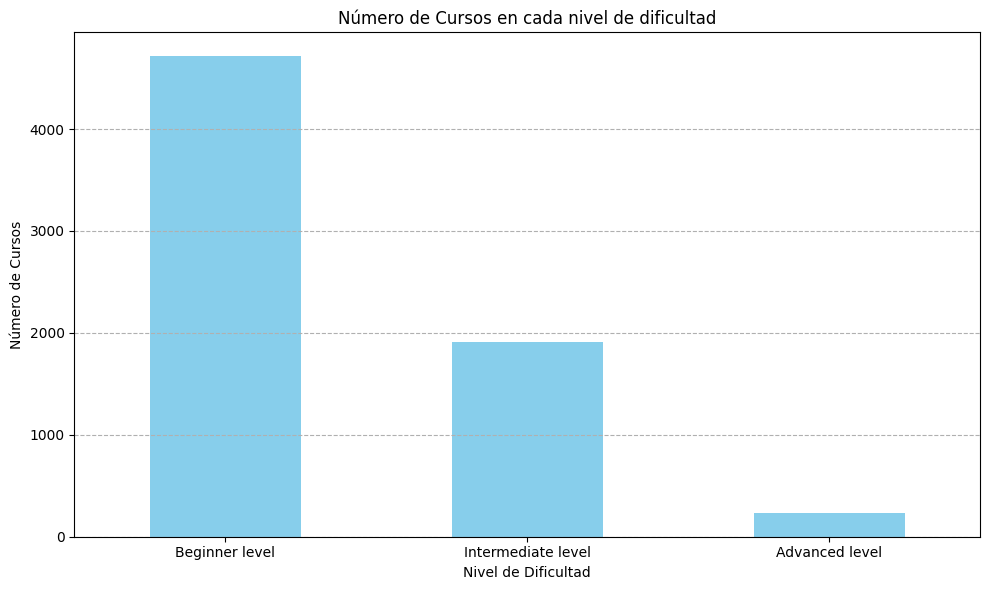

In [6]:
conteo_dificultad = df_cleaned['Level'].value_counts()
plt.figure(figsize=(10, 6))
conteo_dificultad.plot(kind='bar', color='skyblue')
plt.title('Número de Cursos en cada nivel de dificultad')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Existen mas cursos para principiantes, teniendo una menor cantidad para un nivel avanzado, indicando que se esta cubriendo mas cursos para principiantes que otros niveles

gráfica de barras horizontal que muestre el número de cursos en las principales categorías.

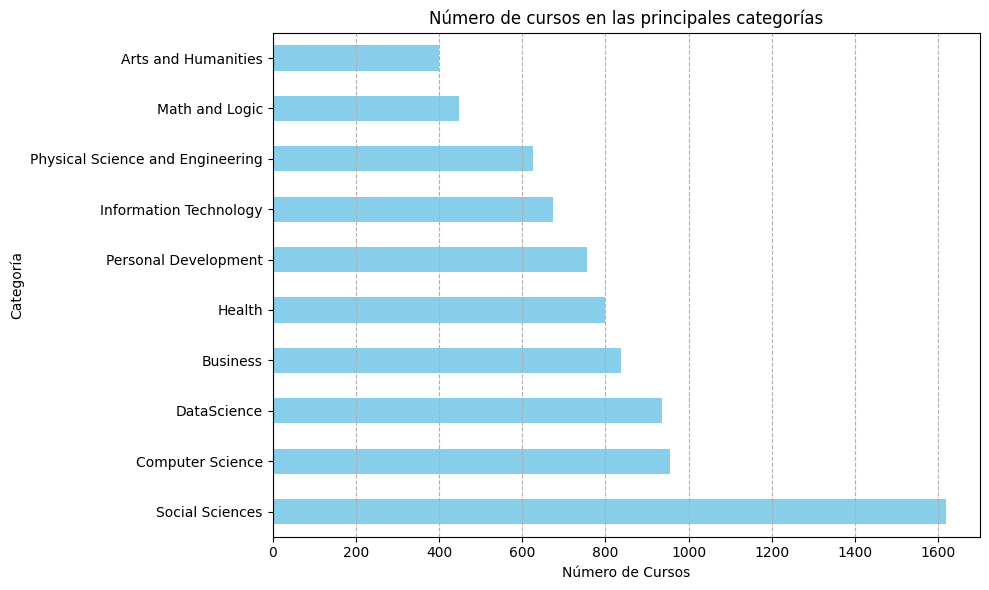

In [7]:
conteo_categorias = df_cleaned['Keyword'].value_counts()
plt.figure(figsize=(10, 6))
conteo_categorias.plot(kind='barh', color='skyblue')
plt.title('Número de cursos en las principales categorías')
plt.xlabel('Número de Cursos')
plt.ylabel('Categoría')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

La mayoria de los cursos se enfoncan mas en Ciencias Sociales teniendo una ventaja significativa en comparacion a otras categorias como Artes y Humanidades la cual es la categoria con menor cursos cubriendolo.

gráfico de dispersión para visualizar la relación entre la duración del curso y el número de revisiones

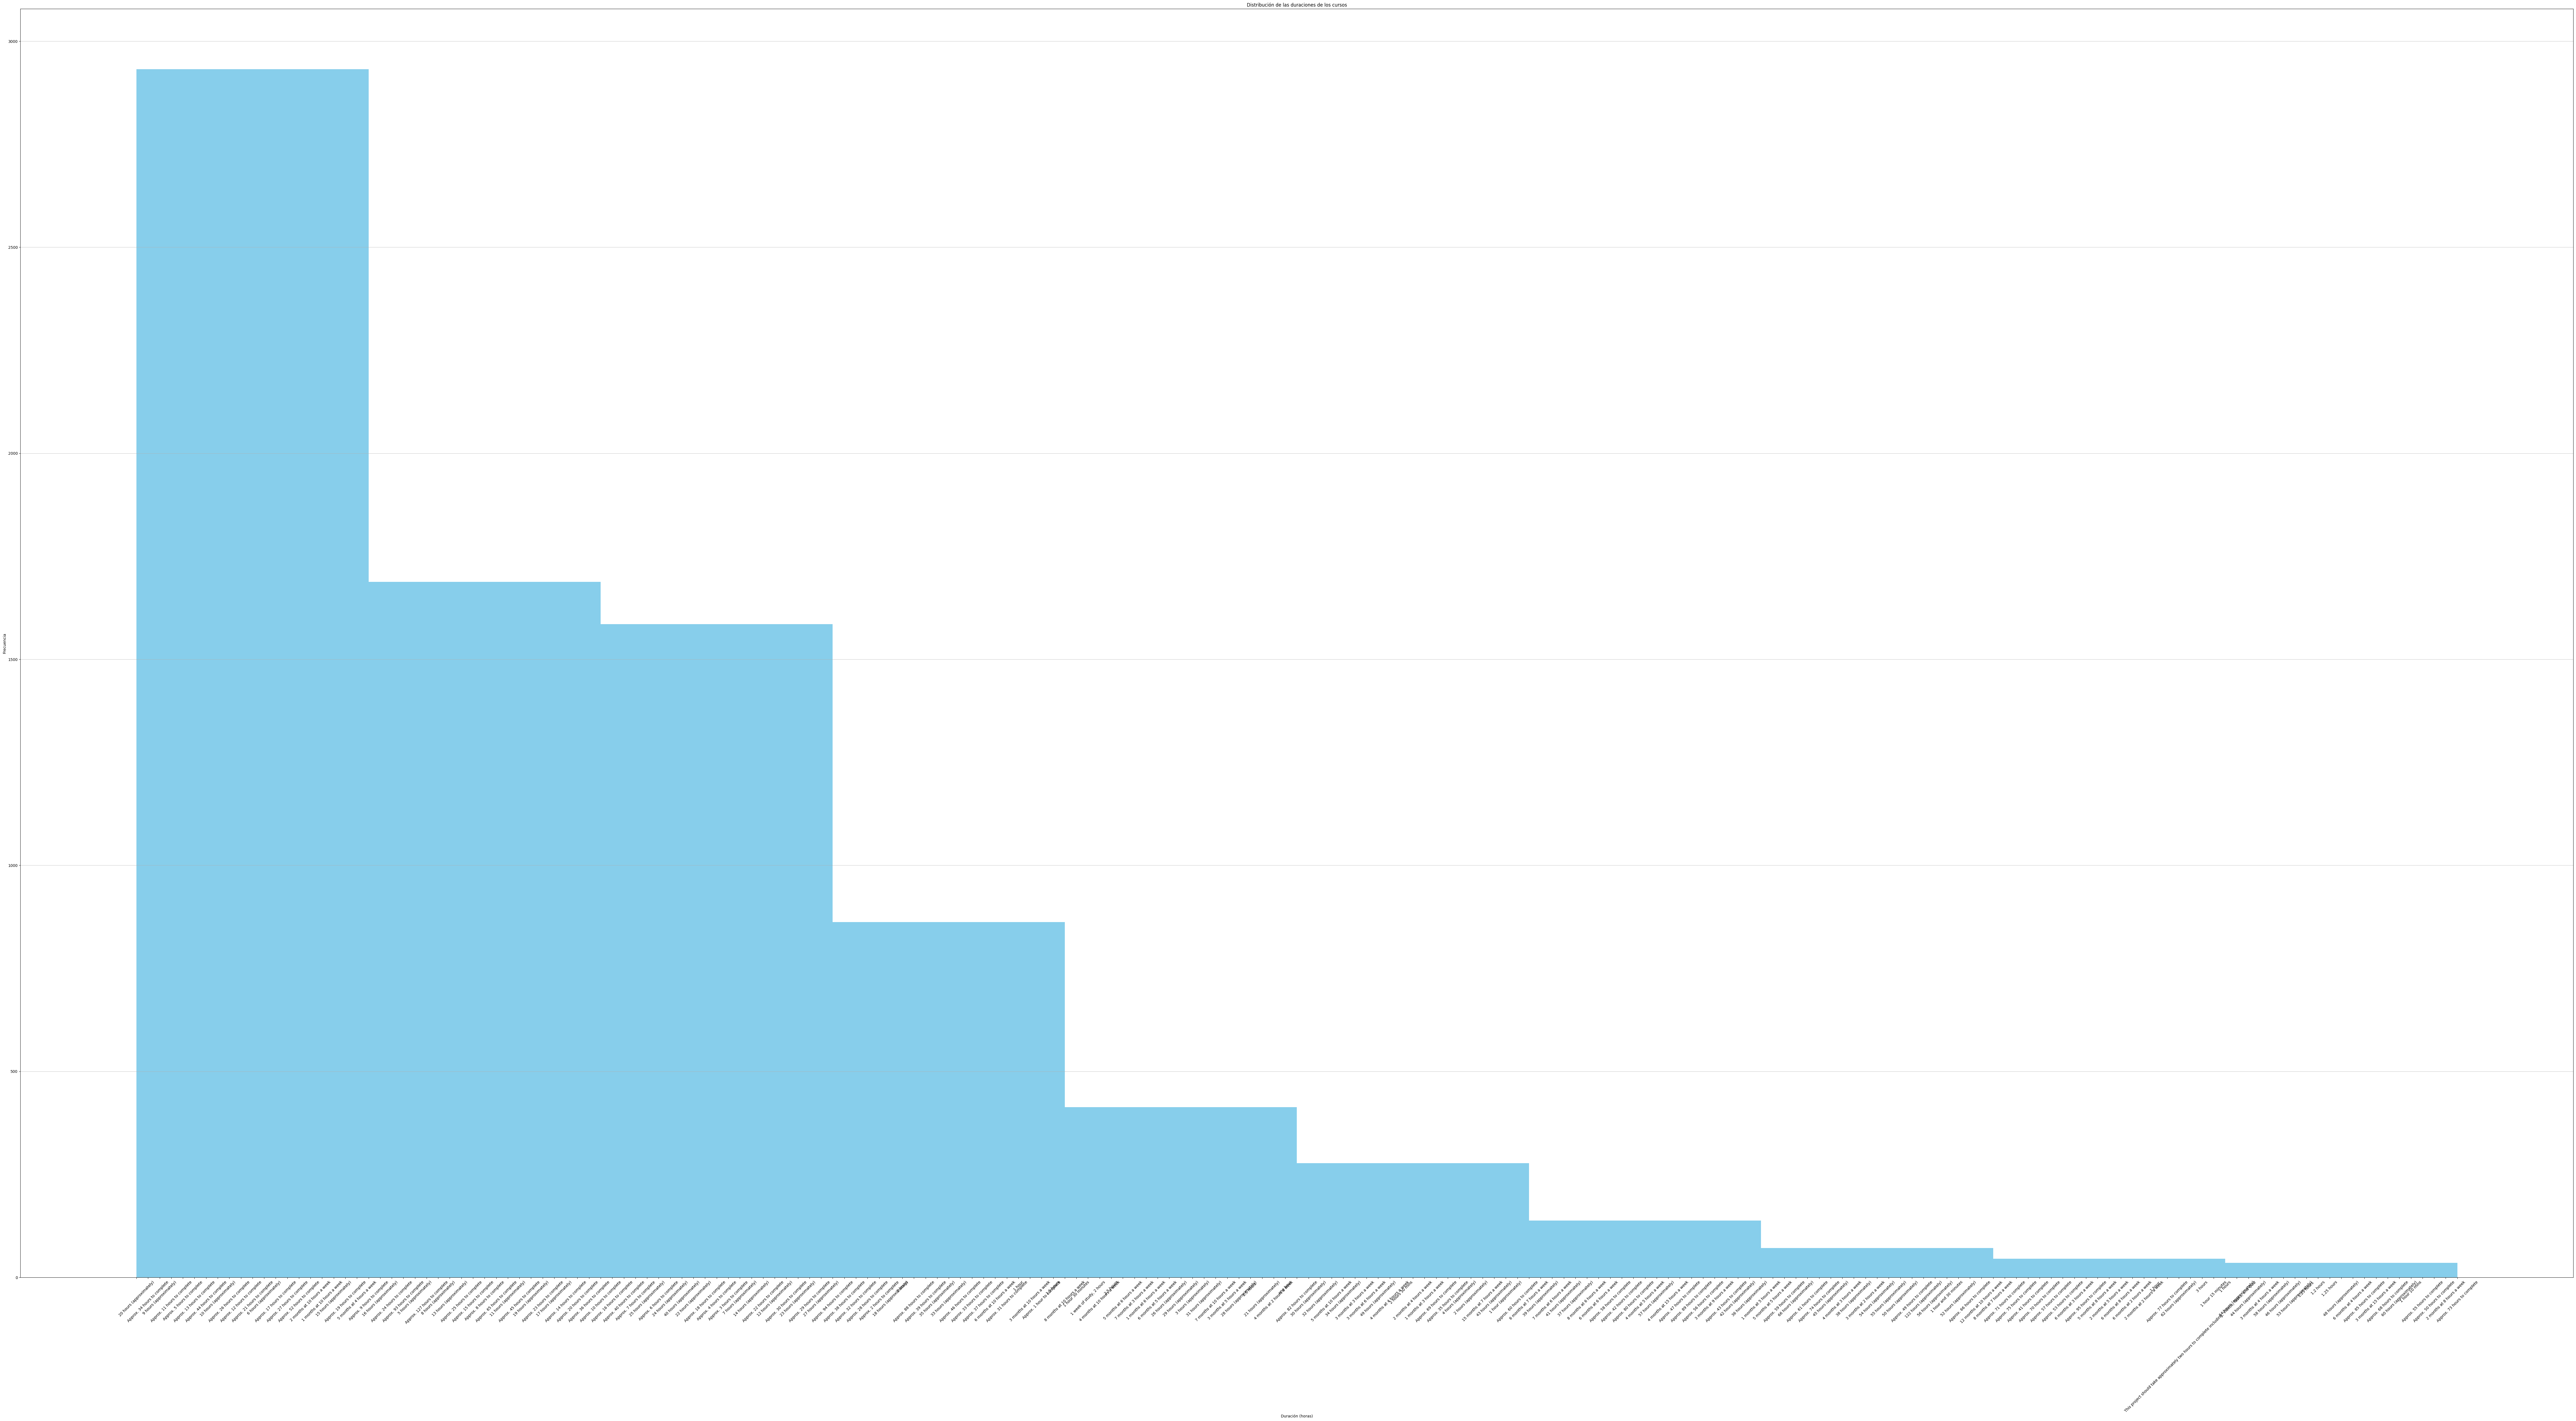

In [8]:
plt.figure(figsize=(120, 60))
plt.hist(df_cleaned['Duration'],color='skyblue')
plt.title('Distribución de las duraciones de los cursos')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

Tenemos que la duracion de los cursos son ampliamente variadas, con ciertos tiempos que tienen mas frecuecia que otros

gráfico de cajas para visualizar la distribución de las calificaciones de los cursos por nivel de dificultad

<Figure size 1200x600 with 0 Axes>

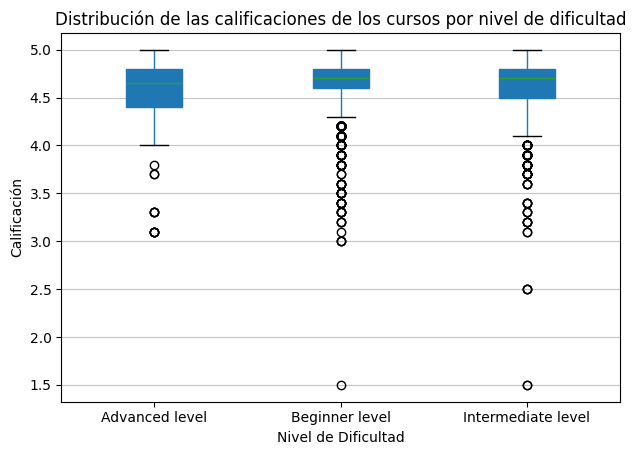

In [10]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Rating', by='Level', grid=False, patch_artist=True)
plt.title('Distribución de las calificaciones de los cursos por nivel de dificultad')
plt.suptitle('')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Calificación')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Tenemos que la calificacion para cursos avanzandos son mas consistentes con muy pocas variaciones en su punteo a diferencia de los principiantes e intermedios donde existe mas valores alejados a las califiaciones de la mayoria de usuarios

Analisis de texto en el archivo .txt

In [22]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

# Leer el archivo de texto
with open('a.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

# Tokenización
tokens = word_tokenize(texto)

# Eliminación de palabras vacías
stop_words = set(stopwords.words('spanish'))
tokens_sin_stopwords = [palabra for palabra in tokens if palabra.lower() not in stop_words]

# Lematización
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(palabra) for palabra in tokens_sin_stopwords]

# Stemming
stemmer = SnowballStemmer('spanish')
tokens_stemming = [stemmer.stem(palabra) for palabra in tokens_sin_stopwords]

# Frecuencia de palabras (usando tokens lematizados)
fdist = FreqDist(tokens_lematizados)

# Gráfico de frecuencia de palabras
plt.figure(figsize=(12, 6))
fdist.plot(30, cumulative=False)
plt.title('Frecuencia de palabras (Lematizadas)')
plt.show()

# Análisis de sentimientos
sia = SentimentIntensityAnalyzer()
sentimiento = sia.polarity_scores(texto)

print("Análisis de sentimientos:")
print(f"Positivo: {sentimiento['pos']}")
print(f"Negativo: {sentimiento['neg']}")
print(f"Neutral: {sentimiento['neu']}")
print(f"Compuesto: {sentimiento['compound']}")

# Imprimir los resultados
print("\nTokens originales:", tokens[:20])
print("\nTokens sin palabras vacías:", tokens_sin_stopwords[:10])
print("\nTokens lematizados:", tokens_lematizados[:10])
print("\nTokens con stemming:", tokens_stemming[:10])
print("\nPalabras más frecuentes (lematizadas):", fdist.most_common(10))

# Comparación de lematización vs stemming
print("\nComparación de Lematización vs Stemming:")
for original, lematizado, stemmed in zip(tokens_sin_stopwords[:20], tokens_lematizados[:20], tokens_stemming[:20]):
    print(f"Original: {original:<15} Lematizado: {lematizado:<15} Stemming: {stemmed:<15}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jefer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jefer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jefer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jefer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jefer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\jefer/nltk_data'
    - 'c:\\Users\\jefer\\Documents\\Universidad\\2024\\Segundo Semestre\\Seminario 2\\laboratorio\\practica 2\\venv\\nltk_data'
    - 'c:\\Users\\jefer\\Documents\\Universidad\\2024\\Segundo Semestre\\Seminario 2\\laboratorio\\practica 2\\venv\\share\\nltk_data'
    - 'c:\\Users\\jefer\\Documents\\Universidad\\2024\\Segundo Semestre\\Seminario 2\\laboratorio\\practica 2\\venv\\lib\\nltk_data'
    - 'C:\\Users\\jefer\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
